# **Engenharia de Software para Ciência de Dados - PUC-Rio**

### Projeto Completo de Classificação Binária (Heart Disease)

Raphael Mandich

# 1. Definição do Problema

O dataset usado neste projeto será o **Heart Disease Data Set**, um conjunto de dados com 76 variáveis relacionadas a características cardíacas de pacientes de algumas localidades. Todos os estudos realizados até hoje utilizam apenas 14 dessas variáveis, e os dados originados em Cleveland são os mais utilizados, contendo 303 observações. Seu objetivo é prever se um paciente tem ou não uma doença cardíaca, com base em certas medidas de diagnóstico médico. O dataset apresenta diversos atributos relacionados a dados médicos, numéricos e categóricos, e uma variável de classe que varia de 0 (sem presença de doença) a 4. Para efeitos deste estudo, tentaremos modelar um algoritmo capaz de diferenciar a presença (valores 1, 2, 3 e 4) da ausência (0) de deonça cardíaca. O dataset completo assim como maiores informações acerca do mesmo pode ser encontrado em  https://archive.ics.uci.edu/ml/datasets/Heart+Disease

**Informações sobre os atributos:**
1. **age** -  Idade em anos 
2. **sex** -  1 = Homem; 0 = Mulher
3. **cp**  -  Tipo de dor no peito 
4. **trestbps** - Pressão sanguínea em repouso 
5. **chol** - Colesterol em mg/dl 
6. **fbs** - Açúcar no sangue em jejum (1 > 120mg/dl; 0 < 120mg/dl) 
7. **restecg** - Resultado do eletrocardiograma em repouso
8. **thalach** - Taxa de batimentos máxima atingida 
9. **exang** - Angina induzida por exercício (1 = True; 0 = False)
10. **oldpeak** - Depressão ST induzida por exercício 
11. **slope** - Inclinação do pico do segmento de exercício ST (1 a 3)
12. **ca** - Número da vasos coloridos por Fluoroscopia (0 a 3)
13. **thal** - Tipo de defeito encontrado no coração (3, 6 ou 7)
14. **target** - Variável de classe, varia de 0 a 4


In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Carga de Dados

Usaremos o pacote Pandas ( Python Data Analysis Library) para carregar um arquivo .csv sem cabeçalho disponível online.

Com o dataset carregado, prosseguiremos com a análise exploratória dos dados.

In [ ]:
# Carrega arquivo csv usando Pandas a partir de uma URL

# Informa a URL de importação do dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# Informa o cabeçalho das colunas
colunas = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
           'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Lê o arquivo utilizando as colunas informadas
dataset = pd.read_csv(url, names=colunas, skiprows=0, delimiter=',')

## 3. Análise de Dados

### 3.1. Estatísticas Descritivas

Iniciaremos examinando as dimensões do dataset, suas informações e alguns exemplos de linhas.

In [ ]:
# Mostra as dimensões do dataset
print(dataset.shape)

(303, 14)


O dataset foi carregado corretamente, com todas as 303 observações de 14 variáveis.

In [ ]:
# Mostra as informações do dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
None


Aqui já podemos perceber um primeiro problema em relação a tipos de variáveis, já que algumas variáveis categóricas foram reconhecidas como numéricas. Essa situação será abordada e corrigida no capítulo 4 desse estudo, a etapa de Pré-Processamento dos dados.

In [ ]:
# Mostra as 10 primeiras linhas do dataset
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [ ]:
# Mostra as 10 últimas linhas do dataset
dataset.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,63.0,1.0,4.0,140.0,187.0,0.0,2.0,144.0,1.0,4.0,1.0,2.0,7.0,2
294,63.0,0.0,4.0,124.0,197.0,0.0,0.0,136.0,1.0,0.0,2.0,0.0,3.0,1
295,41.0,1.0,2.0,120.0,157.0,0.0,0.0,182.0,0.0,0.0,1.0,0.0,3.0,0
296,59.0,1.0,4.0,164.0,176.0,1.0,2.0,90.0,0.0,1.0,2.0,2.0,6.0,3
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [ ]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [ ]:
# distribuição das classes
print(dataset.groupby('target').size())

target
0    164
1     55
2     36
3     35
4     13
dtype: int64


O dataset está razoavelmente balanceado entre observações que possuem doença cardíaca e observações que não possuem

### 3.2. Visualizações Unimodais

Criaremos um histograma para cada atributo do dataset. O histograma não faz sentido para algumas das variáveis que apresentam dados categóricos, mas as variáveis númericas apresentam distribuições próximas da normal, com exceção do atributo "oldpeak".

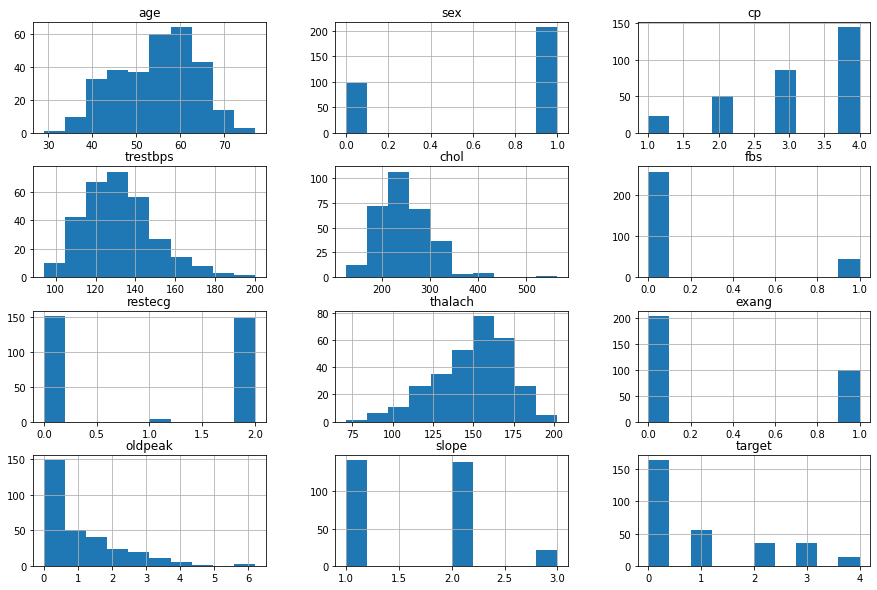

In [ ]:
# Histograma
dataset.hist(figsize = (15,10))
plt.show()

O Gráfico de Densidade, ou Density Plot, é bem parecido com o histograma, mas com uma visualização um pouco diferente. Com ele, pode ser mais fácil identificar a distribuição do atributos do dataset. Assim como fizemos com o histograma, criaremos um density plot para cada atributo do dataset.

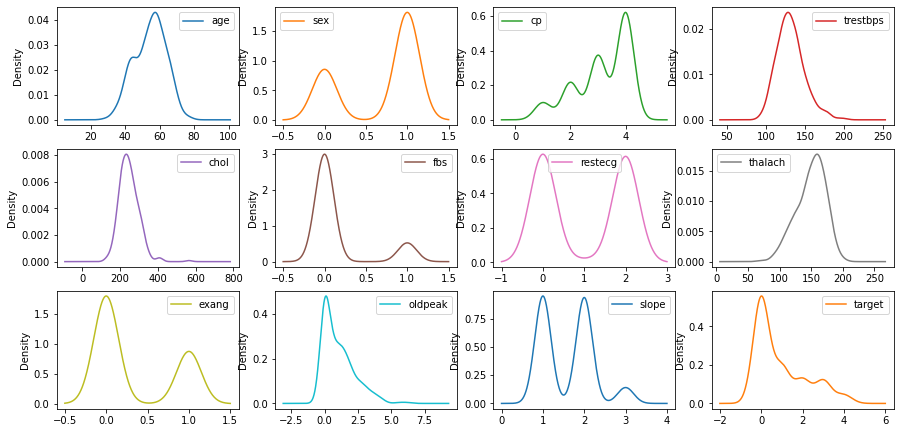

In [ ]:
# Density Plot
dataset.plot(kind = 'density', subplots = True, layout = (4,4), sharex = False, figsize = (15,10))
plt.show()

Agora trabalharemos com boxplots. No boxblot, a linha no centro (vermelha) representa o valor da mediana (segundo quartil ou p50). A linha abaixo é o 1o quartil (p25) e a linha acima o terceiro quartil (p75). O objetivo do boxplot é oferecer uma visualização da dispersão dos dados e os possíveis outliers.

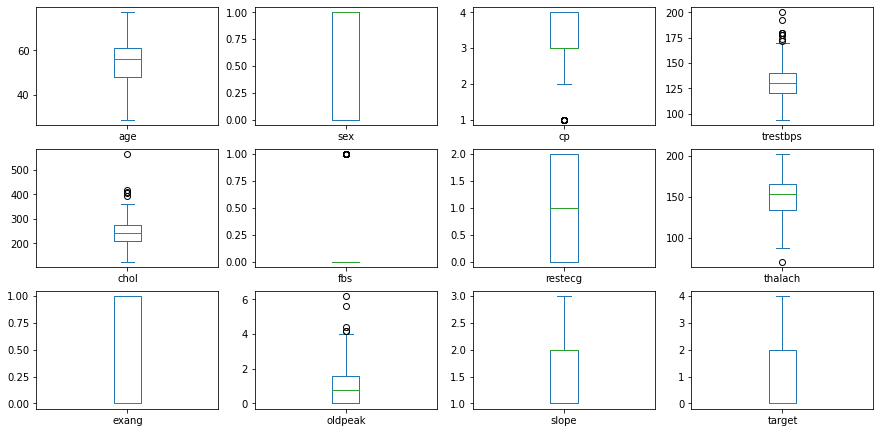

In [ ]:
# Boxplot
dataset.plot(kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False, figsize = (15,10))
plt.show()

### 3.3. Visualizações Multimodais

Vamos agora verificar a correlação entre as variáveis do dataset. A **correlação** representa como duas variáveis numéricas estão relacionadas. Existem várias formas de calcular a correlação entre duas variáveis, como por exemplo, o coeficiente de correlação de Pearson, que pode ser:
* Próximo de -1 : há uma correlação negativa entre as variáveis, 
* Próximo de +1: há uma correlação positiva entre as variáveis. 
* 0: não há correlação entre as variáveis.

Esta informação é relevante porque alguns algoritmos como regressão linear e regressão logística podem apresentar problemas de performance se houver atributos altamente correlacionados.

No caso dos dados presentes nesse dataset, pode-se notar que nenhum par de variáveis apresenta altos valores de correlação. Importante ressaltar que alguns dos valores no gráfico a seguir não fazem muito sentido numa análise estatística, já que são variáveis categóricas que estão representadas em forma numérica. Esse problema de tipos de variáveis será abordado mais profundamente no segmento de pré-processamento.

O código a seguir exibe a matriz de correlação.

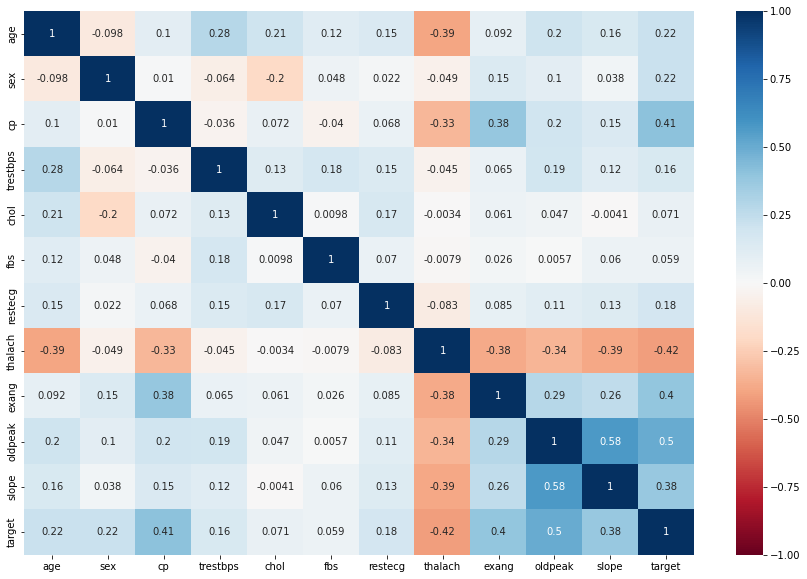

In [ ]:
# Matriz de Correlação
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(dataset.corr(), vmin = -1, vmax = 1, annot=True, cmap='RdBu', ax=ax);

## 4. Pré-Processamento de dados

Nesta etapa, realizaremos diversas operações de preparação de dados para adequar os atributos ao formato exigido pelos algoritmos de Machine Learning. Realizaremos o tratamento de valores NaN(faltantes), limpeza de dados, transformações de variáveis categóricas utilizando one-hot-encoding, além de correções de tipagem de variáveis.

Iniciaremos copiando o dataset sem alterações para um novo objeto.

In [ ]:
# Copia o dataset para um novo objeto
df = dataset.copy()

### 4.1. Tratamento de Missings e Limpeza

In [ ]:
# Verificando nulls no dataset
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

O dataset não apresenta valores nulos, porém, nota-se que a variável "ca" possui algumas observações registradas como "?", que na prática é um valor faltante. Poderíamos tratar esse problema de diversas formas, talvez até mesmo excluindo as observações que apresentam esse valor, mas no caso desse estudo os valores faltantes do atributo "ca" serão considerados como 0. Podemos realizar essa alteração com a seguinte linha de código.

In [ ]:
# Alterar os valores ? na variável ca para 0
df.loc[df.ca == '?', 'ca'] = 0

### 4.2. Alterações de tipo de variáveis 

Agora que o dataset não apresenta nenhum tipo de valor faltante, precisamos verificar se os tipos das variáveis estão de acordo com os valores que elas apresentam. Vamos começar verificando novamente o tipo das variáveis

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
None


Apenas duas das variáveis não estão classificadas como numéricas ("ca" e "thal"), o que faz sentido, já que todas as outras estão representadas por números. Porém, em alguns casos os números são apenas labels (rótulos) representando valores categóricos, e precisamos tomar cuidado para não realizar nenhum tipo de operação matemática com eles, o que causaria resultados incorretos. Iremos realizar todas as transformações necessárias para que os dados fiquem no formato desejado.

Antes disso, precisamos tratar a variável "target". O dataset traz o atributo variando de 0 a 4, porém, para efeitos desse estudo estamos interessados apenas na presença ou não de doença cardíaca, não importando a intensidade. Dessa forma, iremos transformar a variável "target" em binária, variando entre 0 (Sem Incidência) e 1 (Incidência).

In [ ]:
#Alterar os valores de target para transformá-la em binária
df.loc[df.target != 0, 'target'] = 1

Precisamos também alterar o tipo de duas variáveis manualmente, para facilitar algumas transformações posteriores.

In [ ]:
#Alterar a variável thal para o tipo string
df["thal"] = df['thal'].astype('string')

#Alterar a variável ca para o tipo float
df["ca"] = df['ca'].astype(float)

Agora iremos alterar os rótulos numéricos de algumas variáveis para as informações reais que eles representam, para evitar a realização de cálculos que resultariam em ponderações arbitrárias.

In [ ]:
# Alterar rótulos das variáveis categóricas

#cp - chest_pain_type
df.loc[df['cp'] == 1, 'cp'] = 'asymptomatic'
df.loc[df['cp'] == 2, 'cp'] = 'atypical angina'
df.loc[df['cp'] == 3, 'cp'] = 'non-anginal pain'
df.loc[df['cp'] == 4, 'cp'] = 'typical angina'

#sex
df.loc[df['sex'] == 0, 'sex'] = 'female'
df.loc[df['sex'] == 1, 'sex'] = 'male'

#restecg - rest_ecg_type
df.loc[df['restecg'] == 0, 'restecg'] = 'left ventricular hypertrophy'
df.loc[df['restecg'] == 1, 'restecg'] = 'normal'
df.loc[df['restecg'] == 2, 'restecg'] = 'ST-T wave abnormality'

#slope - st_slope_type
df.loc[df['slope'] == 1, 'slope'] = 'downsloping'
df.loc[df['slope'] == 2, 'slope'] = 'flat'
df.loc[df['slope'] == 3, 'slope'] = 'upsloping'

#thal - thalassemia_type
df.loc[df['thal'] == '3.0', 'thal'] = 'normal'
df.loc[df['thal'] == '6.0', 'thal'] = 'fixed defect'
df.loc[df['thal'] == '7.0', 'thal'] = 'reversable defect'

Realizada a alteração, vamos forçar a definição das variáveis como categóricas

In [ ]:
# Alteração de tipo para category
df["cp"] = df['cp'].astype('category')
df["sex"] = df['sex'].astype('category')
df["restecg"] = df['restecg'].astype('category')
df["slope"] = df['slope'].astype('category')
df["thal"] = df['thal'].astype('category')

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    float64 
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    float64 
 4   chol      303 non-null    float64 
 5   fbs       303 non-null    float64 
 6   restecg   303 non-null    category
 7   thalach   303 non-null    float64 
 8   exang     303 non-null    float64 
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    category
 11  ca        303 non-null    float64 
 12  thal      303 non-null    category
 13  target    303 non-null    int64   
dtypes: category(5), float64(8), int64(1)
memory usage: 23.7 KB
None


Com isso concluimos a etapa de alteração de tipos, e agora todas as variáveis estão definidas com o tipo correto.

### 4.3. One-Hot-Encoding

Após as correções de tipagem, alguns atributos do dataset estão definidos como variáveis categóricas, e a grande maioria dos algoritmos de Machine Learning não é capaz de interpretar dados dessa forma. Por isso, realizaremos um processo de conversão de dados categóricos para um formato numérico, que possa servir de entrada para o algoritmo. Existem algumas formas diferentes de realizar esse procedimento, e nesse estudo trabalharemos com a técnica conhecida como One-Hot-Encoding, que transforma os dados categóricos em um array de vetores binários. Faremos isso utilizando a função "get_dummies" da biblioteca Pandas.

In [ ]:
# Cria um novo dataset com as variáveis categóricas convertidas em dummies
final = pd.get_dummies(df, drop_first=True)


Após a execução da função, as novas variáveis acabaram deslocando a variável "target" para o meio do dataset, iremos devolvê-la ao final apenas por fins estéticos e para facilitar a visualização.

In [ ]:
# Move a coluna "target" de volta para a última coluna do dataframe

column_ = final.pop("target")
final.insert(19, "target", column_)

### 4.4. Separação em conjunto de treino e conjunto de teste

Iremos separar nos nossos dados um conjunto de teste, ou conjunto de validação, uma amostra dos dados que não será usada para a construção do modelo, mas somente no fim do projeto para confirmar a precisão do modelo final. É um teste que podemos usar para verificar o quão boa foi a construção do modelo, e para nos dar uma ideia de como o modelo irá performar nas estimativas em dados não vistos. Usaremos 80% do conjunto de dados para modelagem e guardaremos 20% para teste, usando a estratégia train-test-split.

In [ ]:
# Define o tamanho da amostra de teste
test_size = 0.20
# Seed para reprodutibilidade
seed = 123

# Separação em conjuntos de treino e teste (dataset original)
array = final.values
# Seleciona todos os atributos menos a variável target
X = array[:,0:19]
# Seleciona somente a variável target
y = array[:,19]
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y)

Com isso concluímos o pré-processamento dos dados e estamos prontos para começar a construir os modelos.

## 5. Modelos de Classificação

### 5.1. Criação e avaliação de modelos

Para verificar quais modelos performarão melhor neste conjunto de dados,usaremos a validação cruzada 10-fold e avaliaremos os modelos usando a métrica de acurácia. A validação cruzada é uma técnica de avaliação de modelo e treinamento que divide os dados em várias partições e treina vários algoritmos nessas partições (no caso desse estudo, 10 partições). Essa técnica melhora a robustez do modelo mantendo os dados do processo de treinamento. A acurácia indica uma performance geral do modelo, ou seja, dentre todas as classificações, quantas o modelo classificou corretamente. 

In [ ]:
# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=123)

Em seguida, vamos criar uma linha base de desempenho para esse problema, verificando vários modelos diferentes com suas configurações padrão. Utilizaremos os modelos de Regressão Logística (LR), Árvores de classificação (CART), Máquinas de vetores de suporte (SVM), Naive Bayes (NB) e K-vizinhos mais próximos (KNN).

In [ ]:
# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200))) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

Adicionaremos também alguns métodos ensemble que foram abordados ao longo do curso. Estes métodos constroem vários modelos de machine learning, utilizando o resultado de cada modelo na definição de um único resultado, obtendo assim um valor final único.

Isso significa que a resposta agregada de todos esses modelos é que será dada como o resultado final para cada dado que está sendo testado. São algoritmos mais robustos e complexos, que envolvem mais operações e com um custo computacional um pouco maior, mas que, de maneira geral, têm uma performance melhor.

In [ ]:
# Global Seed
np.random.seed(123) 

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os modelos e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

Agora iremos comparar os resultados dos modelos criados, treinando-os com os dados do conjunto de treino e utilizando a técnica de validação cruzada. Para cada um dos modelos criados, executaremos a validação cruzada e, em seguida, exibiremos a acurácia média e o desvio padrão de cada um.

In [ ]:
# Instanciando as listas que armazenarão os resultados
results = []
names = []

In [ ]:
# Global Seed
np.random.seed(123)

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.846667 (0.072835)
KNN: 0.611333 (0.057710)
CART: 0.706833 (0.100134)
NB: 0.809667 (0.079958)
SVM: 0.657333 (0.042630)
Bagging: 0.794000 (0.087131)
RF: 0.814167 (0.064770)
ET: 0.810000 (0.049278)
Ada: 0.764167 (0.070617)
GB: 0.793667 (0.089854)
Voting: 0.810000 (0.087388)


Os resultados indicam que a Regressão Logística apresentou o valor médio de acurácia mais satisfatório, seguido pelos modelos Ensemble Random Forest e Extra Tree Classifier.

A seguir, repetiremos este processo usando uma visão padronizada e outra normalizada do conjunto de dados de treinamento.

### 5.2. Criação e avaliação de modelos: dados padronizados e normalizados

Para analisar o impacto da distribuição dos dados nos modelos, vamos agora experimentar as visões do dataset padronizado e normalizado, comparando com a visão original do dataset. Na padronização (*StandardScaler*), os dados serão transformados de modo que cada atributo tenha média 0 e um desvio padrão 1; na normalização (*MinMaxScaler*), cada atributo é redimensionado para um novo intervalo entre 0 e 1.

Para evitar o vazamento de dados (*data leakage*) nestas transformações, usaremos pipelines que padronizam os dados e constroem o modelo para cada fold de teste de validação cruzada.

In [ ]:
# Global Seed
np.random.seed(123)

# Aqui iremos armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log]))) 
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Padronização do dataset original
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log]))) 
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging]))) 
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Normalização do dataset original
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log]))) 
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging]))) 
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR-orig: 0.847 (0.073)
KNN-orig: 0.611 (0.058)
CART-orig: 0.707 (0.100)
NB-orig: 0.810 (0.080)
SVM-orig: 0.657 (0.043)
Bag-orig: 0.794 (0.087)
RF-orig: 0.814 (0.065)
ET-orig: 0.810 (0.049)
Ada-orig: 0.764 (0.071)
GB-orig: 0.794 (0.090)
Vot-orig: 0.810 (0.087)
LR-padr: 0.830 (0.066)
KNN-padr: 0.785 (0.068)
CART-padr: 0.702 (0.079)
NB-padr: 0.810 (0.080)
SVM-padr: 0.810 (0.057)
Bag-padr: 0.794 (0.080)
RF-padr: 0.810 (0.055)
ET-padr: 0.814 (0.067)
Ada-padr: 0.764 (0.071)
GB-padr: 0.794 (0.098)
Vot-padr: 0.831 (0.071)
LR-norm: 0.834 (0.050)
KNN-norm: 0.810 (0.049)
CART-norm: 0.711 (0.082)
NB-norm: 0.805 (0.084)
SVM-norm: 0.798 (0.062)
Bag-norm: 0.794 (0.083)
RF-norm: 0.815 (0.073)
ET-norm: 0.793 (0.038)
Ada-norm: 0.764 (0.071)
GB-norm: 0.798 (0.093)
Vot-norm: 0.822 (0.056)


Utilizando gráficos boxplot, podemos analisar graficamente a distribuição dos resultados dos folds da validação cruzada para cada modelo.

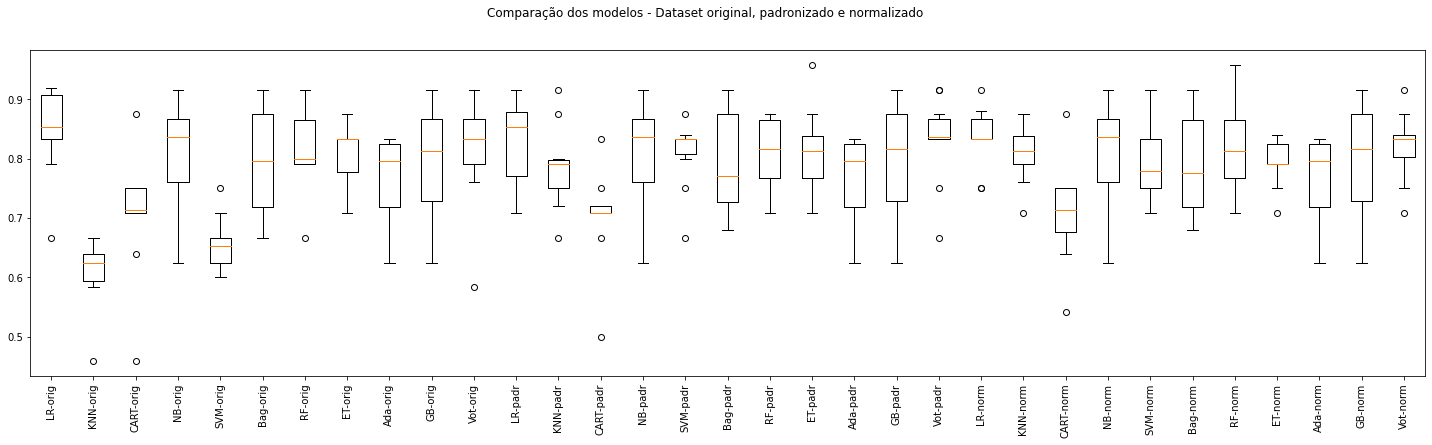

In [ ]:
# Comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos modelos - Dataset original, padronizado e normalizado') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names, rotation=90)
plt.show()

Para o dataset original, os melhores modelos em termos de acurácia foram: LR-orig (0,847) e RF-orig (0,814). Alguns modelos apresentaram melhora significativa na acurácia após a normalização, destacando-se o KNN que foi de uma acurácia de 61% para aproximadamente 81%. Apesar do modelo RF-normalizado ter atingido valores absolutos mais altos de acurácia durante a validação cruzada, nenhum modelo conseguiu bater a acurácia média da Regressão Logística.

Vamos agora variar os hiperparâmetros do KNN e da Regressão Logística, tentando buscar configurações que possam gerar resultados melhores.

### 5.3. Ajuste dos Modelos (Pipeline + Gridsearch)

#### Ajuste do KNN

Vamos variar o número de vizinhos (todos os valores ímpares até 21) e as métricas de distância para o KNN (euclidiana, manhattan e minkowski). Usando o pipeline, cada valor de k e de distância será avaliado usando a validação cruzada 10-fold no conjunto de dados original e com as visões padronizada e normalizada, que mostrou melhores resultados do que os dados originais.

In [ ]:
 # Global Seed
np.random.seed(7)

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('KNN-orig', Pipeline(steps=[knn])))
pipelines.append(('KNN-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('KNN-norm', Pipeline(steps=[min_max_scaler, knn])))

# Conjunto de parâmetros a serem testados
param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:    
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)

# Exibe a melhor configuração
print("%s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_)) 

KNN-norm - Melhor: 0.810000 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 5}


A melhor configuração encontrada utiliza o dataset com dados normalizados, distância Euclidiana e k=5.

#### Ajuste da Regressão Logística
Iremos ajustar três hiperparâmetros do algoritmo de Regressão logística: o valor de C (que indica o peso a ser atribuído aos dados de treinamento), o tipo de solver utilizado e os valores de penalty (l1 e l2).

Iremos testar outros valores para estes hiperparâmetros, e cada combinação de valores será avaliada usando a função GridSearchCV, como fizemos anteriormente para o KNN.


In [ ]:
 # Global Seed
np.random.seed(123)

pipelines = []

# Definindo os componentes do pipeline
reg_log = ('LR', LogisticRegression())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('lr-orig', Pipeline(steps=[reg_log])))
pipelines.append(('lr-padr', Pipeline(steps=[standard_scaler, reg_log])))
pipelines.append(('lr-norm', Pipeline(steps=[min_max_scaler, reg_log])))

# Conjunto de parâmetros a serem testados
param_grid = {
    #Retorna 7 valores de logaritmo separados uniformemente entre -3 e 3
    'LR__C' : np.logspace(-3,3,7), 
    'LR__penalty' : ['l1','l2'],
    'LR__solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:    
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)

# Exibe a melhor configuração
print("%s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_)) 

lr-norm - Melhor: 0.838500 usando {'LR__C': 10.0, 'LR__penalty': 'l2', 'LR__solver': 'liblinear'}


A melhor configuração encontrada ficou bastante próxima mas não foi capaz de superar o valor original de quase 85% de acurácia que havíamos obtido com o primeiro modelo de Regressão Logística.

## 7. Finalização do Modelo

Analisando os resultados até aqui, verificamos que o modelo que mostrou melhor acurácia média para o problema foi o que usou Regressão Logística como algoritmo.

A seguir, finalizaremos este modelo, treinando-o em todo o conjunto de dados de treinamento (sem validação cruzada) e faremos predições para o conjunto de dados de teste que foi separado logo no início do exemplo, a fim de confirmarmos nossas descobertas.

Primeiro, iremos realizar a padronização dos dados de entrada. Depois, treinaremos o modelo e exibiremos a acurácia de teste, a matriz de confusão, o relatório de classificação e calcularemos a área sob a curva ROC, que é uma outra medida de classificação que, de forma sucinta, indica o quanto o modelo é capaz de distinguir entre as classes.




In [ ]:
# Preparação do modelo
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = LogisticRegression(max_iter=200)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test)
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
auc_roc = roc_auc_score(y_test,predictions)
print("Área sob a curva ROC: %f" % (auc_roc))

0.8688524590163934
[[30  3]
 [ 5 23]]
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88        33
         1.0       0.88      0.82      0.85        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Área sob a curva ROC: 0.865260


Por meio do conjunto de teste, verificamos que alcançamos uma acurácia de quase 87% em dados não vistos. Este resultado foi ainda melhor do que as nossas expectativas, pois durante os testes a acurácia máxima que conseguimos atingir foi de 84,7%. Podemos também visualizar a matriz de confusão e a curva ROC de maneira gráfica, conforme abaixo:

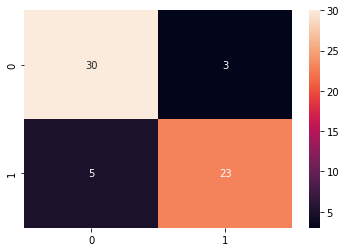

In [ ]:
# Matriz de confusão com Seaborn
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

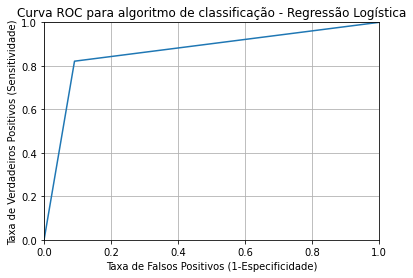

In [ ]:
# Curva ROC com Matplotlib
tfp, tvp, limites = roc_curve(y_test, predictions)
plt.plot(tfp,tvp)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Curva ROC para algoritmo de classificação - Regressão Logística')
plt.xlabel('Taxa de Falsos Positivos (1-Especificidade)')
plt.ylabel('Taxa de Verdadeiros Positivos (Sensitividade)')
plt.grid(True)

## 8. Conclusão

Este estudo buscou elaborar um projeto de classificação completo, desde a carga dos dados até o ajuste dos hiperparâmetros dos modelos, passando pela análise descritiva, pré-processamento dos dados e criação e avaliação de diversos modelos diferentes. Entre as opções exploradas, conseguimos obter um modelo de regressão logística capaz de classificar corretamente quase 87% dos casos, uma acurácia bastante satisfatória.

O modelo ainda possui espaço para melhoria, e as primeiras opções de aperfeiçoamento passam por um entendimento mais detalhado da interação dos dados com o algoritmo, realizando testes estatísticos mais aprofundados para definir quais atributos tem peso maior na variável de classe, assim obtendo previsões mais precisas.

